In [1]:
import spacy
import nltk

In [2]:
import pandas as pd
import numpy as np

import re  ## Regular Expression
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from tensorflow.keras.models import model_from_json 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
summary = pd.read_csv('data-sets/news_summary.csv',encoding='iso-8859-1')
summary.head()

/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_4989/582669663.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,25,26,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,26

,author,date,headlines,read_more,text,ctext,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
summary.columns

Index(['author', 'date', 'headlines', 'read_more', 'text', 'ctext',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 272', 'Unnamed: 273', 'Unnamed: 274', 'Unnamed: 275',
       'Unnamed: 276', 'Unnamed: 277', 'Unnamed: 278', 'Unnamed: 279',
       'Unnamed: 280', 'Unnamed: 281'],
      dtype='object', length=282)

In [7]:
raw = pd.read_csv('data-sets/news_summary_more.csv',encoding='iso-8859-1')
raw.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [8]:
raw.columns

Index(['headlines', 'text'], dtype='object')

In [9]:
pre1 = raw.iloc[:, 0:2].copy()
pre1.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [10]:
pre2 = summary.iloc[:, 0:6].copy()
pre2.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [11]:
# To increase the intake of possible text values to build a reliable model
## Combining without headlines column
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], 
        sep=' '), sep=' '), sep=' '), sep=' ')

pre2['text']

0       Chhavi Tyagi 03 Aug 2017,Thursday http://www.h...
1       Daisy Mowke 03 Aug 2017,Thursday http://www.hi...
2       Arshiya Chopra 03 Aug 2017,Thursday http://www...
3       Sumedha Sehra 03 Aug 2017,Thursday http://indi...
4       Aarushi Maheshwari 03 Aug 2017,Thursday http:/...
                              ...                        
4511    Mansha Mahajan 24 Feb 2017,Friday http://india...
4512    Dishant Sharma 03 Aug 2017,Thursday http://ind...
4513    Tanya Dhingra 03 Aug 2017,Thursday http://www....
4514    Pragya Swastik 07 Dec 2016,Wednesday http://in...
4515    Chhavi Tyagi 03 Aug 2017,Thursday http://india...
Name: text, Length: 4516, dtype: object

In [12]:
pre1['text']

0        Saurav Kant, an alumnus of upGrad and IIIT-B's...
1        Kunal Shah's credit card bill payment platform...
2        New Zealand defeated India by 8 wickets in the...
3        With Aegon Life iTerm Insurance plan, customer...
4        Speaking about the sexual harassment allegatio...
                               ...                        
98396    A CRPF jawan was on Tuesday axed to death with...
98397    'Uff Yeh', the first song from the Sonakshi Si...
98398    According to reports, a new version of the 199...
98399    A new music video shows rapper Snoop Dogg aimi...
98400    Madhesi Morcha, an alliance of seven political...
Name: text, Length: 98401, dtype: object

In [13]:
## Combining Raw and Summarized Text
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre.head()

,text
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Kunal Shah's credit card bill payment platform...
2,New Zealand defeated India by 8 wickets in the...
3,"With Aegon Life iTerm Insurance plan, customer..."
4,Speaking about the sexual harassment allegatio...


In [14]:
## Combining Raw and Summarized Headlines
pre['summary'] = pd.concat([pre1['headlines'], pre2['headlines']],ignore_index=True)
pre.head()

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [15]:
pre['text'][0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [16]:
pre.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...


## Data PreProcessing

In [17]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):

    for row in column:
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()

        # Remove ~ if it occurs more than one time consecutively
        row = re.sub("(~~+)", " ", str(row)).lower()

        # Remove + if it occurs more than one time consecutively
        row = re.sub("(\+\++)", " ", str(row)).lower()

        # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.\.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

        # Remove mailto:
        row = re.sub("(mailto:)", " ", str(row)).lower()

        # Remove \x9* in text
        row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

        # Replace INC nums to INC_NUM
        row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

        # Replace CM# and CHG# to CM_NUM
        row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()

        yield row

In [55]:
## all sentences to lower cases
def casefolding(sentence):
    return sentence.lower()

## Removes all punctuation and numbers, leaving only the alphabet characters
def cleaning(sentence):
    return re.sub(r'[^a-z]', ' ', re.sub("’", '', sentence))

def tokenization(sentence):
    return sentence.split()

def stopword_removal(self, token):
    temp = []
    for i in range(len(token)):
        if token[i] not in self.stopwords:
            temp.append(token[i])
    return temp

## Whole story into collection of sentences (Tokenisation)
def sentence_split(paragraph):
    return nltk.sent_tokenize(paragraph)

## Giving weighs to the words to determine whether it has effect or not
def word_freq(data):
    
    w = []
    
    for sentence in data:
        for words in sentence:
            w.append(words)
    bag = list(set(w))
    res = {}
    
    for word in bag:
        res[word] = w.count(word)
    return res

## Knowing the weighs of each senteces (whether the sentence represents the best story)
def sentence_weight(data):
    weights = []
    for words in data:
        temp = 0
        for word in words:
            temp += wordfreq[word]
        weights.append(temp)
    return weights

In [19]:
processed_text = text_strip(pre['text'])
processed_text

<generator object text_strip at 0x29dfd04a0>

In [20]:
processed_summary = text_strip(pre['summary'])
processed_summary

<generator object text_strip at 0x29dfd0430>

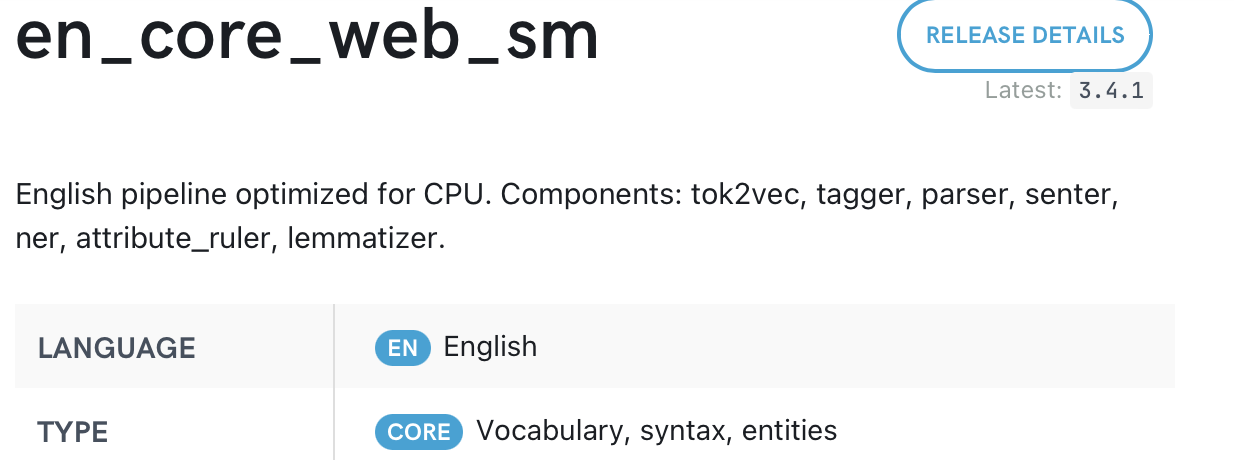

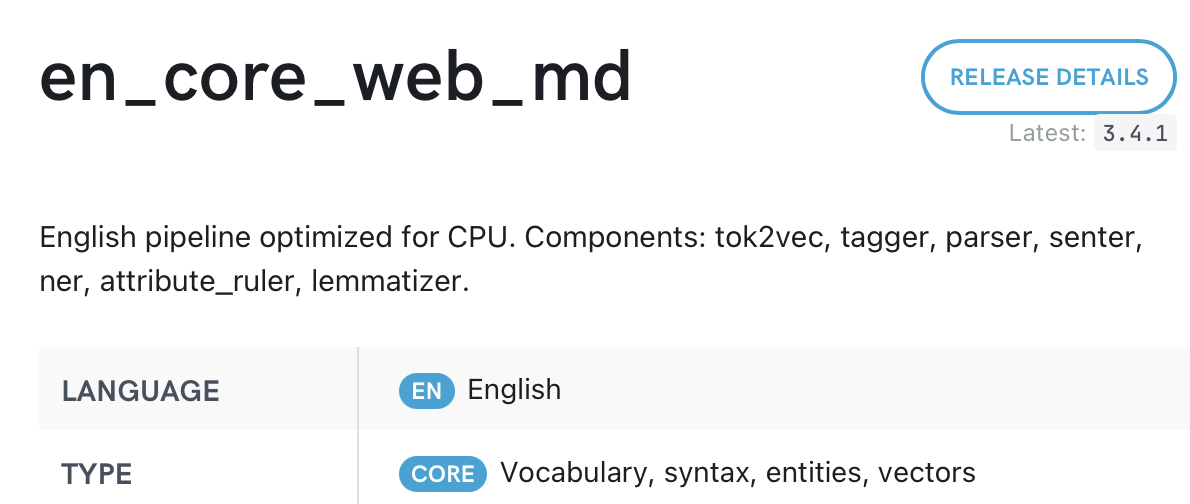

In [21]:
## Loading the English(vocabulary) language in spacy.load()
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) 

/Users/prashanthsingaravelan/miniforge3/lib/python3.10/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['ner', 'parser'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [22]:
# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=500)]
text

['saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.',
 'kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands like ixigo bookmyshow ubereats cult.fit and more.',
 'new zealand defeated india by wickets in the fourth odi at hamilton on thursday to win their first match of the five-match odi series india lost an international match under rohit sharma captaincy after 12 consecutive victories dating back to march 2018 the match witnessed india getting all out for 

In [23]:
text[0]

'saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.'

In [24]:
# Process text as batches and yield Doc objects in order   (__START__ | __END__)
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=500)]
summary

['_START_ upgrad learner switches to career in ml al with 90% salary hike _END_',
 '_START_ delhi techie wins free food from swiggy for one year on cred _END_',
 '_START_ new zealand end rohit sharma-led india 12-match winning streak _END_',
 '_START_ aegon life iterm insurance plan helps customers save tax _END_',
 '_START_ have known hirani for yrs what if metoo claims are not true sonam _END_',
 '_START_ rahat fateh ali khan denies getting notice for smuggling currency _END_',
 '_START_ india get all out for 92 their lowest odi total in new zealand _END_',
 '_START_ govt directs alok verma to join work day before his retirement _END_',
 '_START_ called pm modi sir 10 times to satisfy his ego andhra cm _END_',
 '_START_ cong wins ramgarh bypoll in rajasthan takes total to 100 seats _END_',
 '_START_ up cousins fed human excreta for friendship with boys _END_',
 '_START_ 81-yr-old woman conducts physical training in khand schools _END_',
 '_START_ ram krishna didn smoke why should we 

In [25]:
summary[0]

'_START_ upgrad learner switches to career in ml al with 90% salary hike _END_'

## Determining the Maximum Permissible Sequence Lengths

In [26]:
pre['cleaned_text']    = pd.Series(text)
pre['cleaned_text']

0         saurav kant an alumnus of upgrad and iiit-b pg...
1         kunal shah credit card bill payment platform c...
2         new zealand defeated india by wickets in the f...
3         with aegon life iterm insurance plan customers...
4         speaking about the sexual harassment allegatio...
                                ...                        
102912    mansha mahajan 24 feb 2017 friday indiatoday.i...
102913    dishant sharma 03 aug 2017 thursday indiatoday...
102914    tanya dhingra 03 aug 2017 thursday www.hindust...
102915    pragya swastik 07 dec 2016 wednesday indiatoda...
102916    chhavi tyagi 03 aug 2017 thursday indiatoday.i...
Name: cleaned_text, Length: 102917, dtype: object

In [27]:
pre['cleaned_summary'] = pd.Series(summary)
pre['cleaned_summary']

0         _START_ upgrad learner switches to career in m...
1         _START_ delhi techie wins free food from swigg...
2         _START_ new zealand end rohit sharma-led india...
3         _START_ aegon life iterm insurance plan helps ...
4         _START_ have known hirani for yrs what if meto...
                                ...                        
102912    _START_ rasna seeking 250 cr revenue from snac...
102913    _START_ sachin attends rajya sabha after quest...
102914    _START_ shouldn rob their childhood aamir on k...
102915    _START_ asha bhosle gets 53 000 power bill for...
102916    _START_ more than half of india languages may ...
Name: cleaned_summary, Length: 102917, dtype: object

Plot a graph to determine the frequency ranges tied to the lengths of text and summary, i.e., 
determine the range of length of words where the maximum number of texts and summaries fall into.

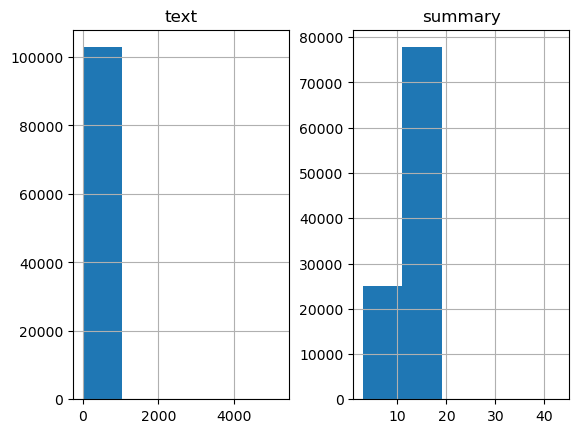

In [28]:
text_count = []
summary_count = []

for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text']    = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [29]:
# Check how much % of text have 0-100 words
pre['cleaned_text']

0         saurav kant an alumnus of upgrad and iiit-b pg...
1         kunal shah credit card bill payment platform c...
2         new zealand defeated india by wickets in the f...
3         with aegon life iterm insurance plan customers...
4         speaking about the sexual harassment allegatio...
                                ...                        
102912    mansha mahajan 24 feb 2017 friday indiatoday.i...
102913    dishant sharma 03 aug 2017 thursday indiatoday...
102914    tanya dhingra 03 aug 2017 thursday www.hindust...
102915    pragya swastik 07 dec 2016 wednesday indiatoda...
102916    chhavi tyagi 03 aug 2017 thursday indiatoday.i...
Name: cleaned_text, Length: 102917, dtype: object

In [30]:
# Check how much % of text have 0-100 words
cnt = 0
for i in pre['cleaned_text']:
    if len(i.split()) <= 100:
        cnt = cnt + 1
print(cnt / len(pre['cleaned_text']))

0.9578300960968548


In [31]:
# Model to summarize the text between 0-15 words for 
##                    Summary and 0-100 words for Text
max_text_len    = 100
max_summary_len = 15

## Selecting Plausible Texts and Summaries

In [32]:
# Select the Summaries and Text which fall below max length 

import numpy as np

cleaned_text = np.array(pre['cleaned_text'])
cleaned_summary= np.array(pre['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if (len(cleaned_summary[i].split()) <= max_summary_len) and (len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head()

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...
2,new zealand defeated india by wickets in the f...,_START_ new zealand end rohit sharma-led india...
3,with aegon life iterm insurance plan customers...,_START_ aegon life iterm insurance plan helps ...
4,speaking about the sexual harassment allegatio...,_START_ have known hirani for yrs what if meto...


In [33]:
# Add sostok and eostok

post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x + ' eostok')

post_pre.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,sostok _START_ upgrad learner switches to care...
1,kunal shah credit card bill payment platform c...,sostok _START_ delhi techie wins free food fro...


In [34]:
np.array(post_pre["text"])

array(['saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.',
       'kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands like ixigo bookmyshow ubereats cult.fit and more.',
       'new zealand defeated india by wickets in the fourth odi at hamilton on thursday to win their first match of the five-match odi series india lost an international match under rohit sharma captaincy after 12 consecutive victories dating back to march 2018 the match witnessed india ge

## Tokenizing the Text

In [35]:
x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(post_pre["text"]), np.array(post_pre["summary"]), test_size=0.1, random_state=0, shuffle=True)

In [36]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [37]:
thresh = 5  ## rare words occurence

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  62.646061538073695


In [38]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

In [39]:
# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_tr_seq

[[786,
  20660,
  123,
  59,
  459,
  10549,
  8628,
  377,
  8629,
  7,
  9,
  41,
  22,
  1791,
  288,
  47,
  60,
  19,
  2555,
  88,
  355,
  2066,
  19,
  1955,
  1160,
  587,
  1884,
  41,
  105,
  60,
  4,
  15061,
  31,
  5,
  3276,
  16,
  315,
  15548,
  8629,
  12,
  8628,
  377,
  19,
  16,
  46,
  251,
  44,
  15548,
  12,
  16,
  315,
  19,
  16,
  166,
  251],
 [5124,
  1024,
  244,
  56,
  14632,
  20661,
  167,
  31,
  1792,
  6,
  127,
  3,
  1996,
  2,
  1330,
  1,
  4020,
  4,
  1,
  48,
  5,
  1834,
  5271,
  501,
  41,
  1622,
  382,
  134,
  99,
  2153,
  1816,
  11,
  2,
  24,
  890,
  47,
  31,
  14,
  1,
  1479,
  831,
  123,
  1,
  582,
  1661,
  1086,
  35,
  20661,
  490,
  3,
  49,
  6188,
  1978],
 [7635,
  2079,
  687,
  10366,
  8630,
  503,
  16,
  1374,
  1889,
  4038,
  3,
  528,
  201,
  6,
  158,
  2,
  3093,
  79,
  53,
  422,
  2328,
  1508,
  310,
  4,
  190,
  1889,
  343,
  4792,
  3,
  1,
  528,
  1508,
  26,
  1856,
  1,
  1911,
  44,
  3928

In [40]:
x_val_seq = x_tokenizer.texts_to_sequences(x_val)
x_val_seq

[[4088,
  1,
  212,
  358,
  1,
  4649,
  20,
  15585,
  393,
  840,
  245,
  7,
  9,
  10,
  1,
  537,
  559,
  14502,
  172,
  3,
  28,
  5,
  106,
  12,
  2322,
  179,
  3816,
  2921,
  3,
  1,
  7515,
  1,
  537,
  3886,
  2,
  25563,
  1,
  550,
  8,
  1,
  1103,
  2,
  910,
  5065,
  3028,
  222,
  3464,
  5,
  2804,
  13,
  32],
 [1,
  2547,
  4,
  48,
  303,
  3,
  259,
  125,
  7,
  30,
  639,
  3948,
  431,
  303,
  2348,
  65,
  303,
  382,
  6,
  77,
  136,
  605,
  41,
  11,
  639,
  3948,
  1,
  2547,
  9,
  41,
  26,
  494,
  78,
  173,
  41,
  254,
  100,
  41,
  11,
  639,
  1,
  3810,
  2803,
  5,
  179,
  10,
  41,
  11,
  77,
  7964,
  261,
  242,
  129,
  642,
  31,
  267],
 [1,
  80,
  48,
  167,
  17,
  81,
  3801,
  74,
  1125,
  431,
  84,
  2,
  153,
  293,
  1327,
  539,
  265,
  414,
  145,
  851,
  6047,
  5,
  2670,
  6401,
  22,
  879,
  1,
  1045,
  485,
  660,
  81,
  24,
  2764,
  2,
  3977,
  1,
  399,
  5,
  2639,
  3,
  80,
  81,
  25,
  2,
  1279,


In [41]:
# Pad zero upto maximum length
x_tr  = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 29635


### Prepare a tokenizer on testing data

In [42]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 62.55265986809611
Size of vocabulary in Y = 12890


In [43]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [44]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

## Model Building

In [45]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

In [46]:
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb     = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,return_state=True, dropout=0.4,recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

In [47]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     5927000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [48]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [49]:
# model = model.fit(
#     [x_tr, y_tr[:, :-1]],
#     y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
#     epochs=10,
#     callbacks=[es],
#     batch_size=128,
#     validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]),
# )

## Retrieving the Stored model

In [50]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")

In [51]:
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

model = model_from_json(loaded_model_json)

# load weights into new model

model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded Model from disk


## Predicting with the user-input

In [52]:
text = ''' The Supreme Court today refused to stay the exercise of NOTA (none of the above) option in the 
Gujarat Rajya Sabha elections scheduled to take place on 8 August. The SC further said that the issue would be 
heard as a constitutional question ? whether NOTA would apply to election of council of states
'''

In [53]:
## splitting based upon full stops
sentence_list = sentence_split(text)
sentence_list

[' The Supreme Court today refused to stay the exercise of NOTA (none of the above) option in the \nGujarat Rajya Sabha elections scheduled to take place on 8 August.',
 'The SC further said that the issue would be \nheard as a constitutional question ?',
 'whether NOTA would apply to election of council of states']

In [56]:
data = []
for sentence in sentence_list:
    data.append(tokenization(cleaning(casefolding(sentence))))
data = (list(filter(None, data)))
data

[['the',
  'supreme',
  'court',
  'today',
  'refused',
  'to',
  'stay',
  'the',
  'exercise',
  'of',
  'nota',
  'none',
  'of',
  'the',
  'above',
  'option',
  'in',
  'the',
  'gujarat',
  'rajya',
  'sabha',
  'elections',
  'scheduled',
  'to',
  'take',
  'place',
  'on',
  'august'],
 ['the',
  'sc',
  'further',
  'said',
  'that',
  'the',
  'issue',
  'would',
  'be',
  'heard',
  'as',
  'a',
  'constitutional',
  'question'],
 ['whether',
  'nota',
  'would',
  'apply',
  'to',
  'election',
  'of',
  'council',
  'of',
  'states']]

In [57]:
wordfreq = word_freq(data)
word_freq

<function __main__.word_freq(data)>

In [58]:
rank = sentence_weight(data)
rank

[59, 25, 20]

In [59]:
n = 2
result = ''
sort_list = np.argsort(rank)[::-1][:n]
for i in range(n):
    result += '{} '.format(sentence_list[sort_list[i]])
result

' The Supreme Court today refused to stay the exercise of NOTA (none of the above) option in the \nGujarat Rajya Sabha elections scheduled to take place on 8 August. The SC further said that the issue would be \nheard as a constitutional question ? '